In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('./Covid_XRAY/metadata.csv')

In [4]:
col = ['survival', 'intubated','intubation_present', 'went_icu', 'in_icu', 
           'needed_supplemental_O2','extubated', 'temperature', 'pO2_saturation', 
           'leukocyte_count','neutrophil_count', 'lymphocyte_count', 'folder', 
           'filename', 'doi', 'url', 'license','clinical_notes', 'other_notes', 'Unnamed: 28']

In [5]:
df = df.drop(labels = col,axis=1)

null_list = list(df['sex'].isnull())
for i,row in df.iterrows():
    if null_list[i] == True:
        df = df.drop(i)
        
df.head()

,patientid,offset,sex,age,finding,view,modality,date,location
0,2,0.0,M,65.0,COVID-19,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam"
1,2,3.0,M,65.0,COVID-19,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam"
2,2,5.0,M,65.0,COVID-19,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam"
3,2,6.0,M,65.0,COVID-19,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam"
4,4,0.0,F,52.0,COVID-19,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 0 to 371
Data columns (total 9 columns):
patientid    329 non-null int64
offset       254 non-null float64
sex          329 non-null object
age          315 non-null float64
finding      329 non-null object
view         329 non-null object
modality     329 non-null object
date         253 non-null object
location     246 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 25.7+ KB


In [7]:
df['offset'] = df['offset'].fillna(df['offset'].mean())
df['age'] = df['age'].fillna(df['age'].mean())
df['location'] = df['location'].fillna(np.random.choice(['USA','China']))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 0 to 371
Data columns (total 9 columns):
patientid    329 non-null int64
offset       329 non-null float64
sex          329 non-null object
age          329 non-null float64
finding      329 non-null object
view         329 non-null object
modality     329 non-null object
date         253 non-null object
location     329 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 25.7+ KB


### Analysing of Dataset

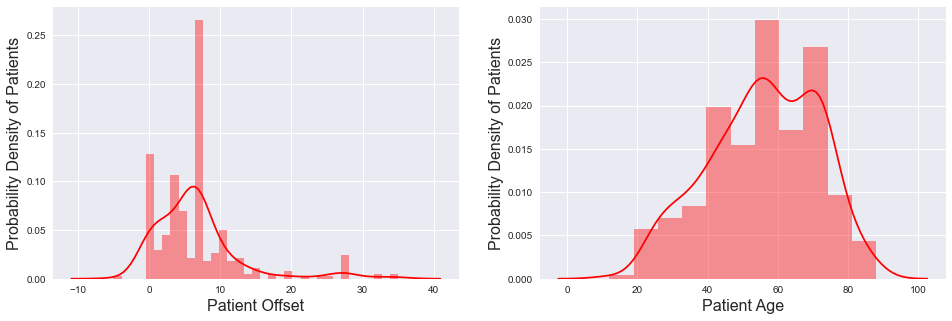

In [9]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

s1 = sns.distplot(df['offset'],color='red',ax=ax[0])
s1.set_xlabel('Patient Offset',fontsize=16)
s1.set_ylabel('Probability Density of Patients',fontsize=16)

s2 = sns.distplot(df['age'],color='red',ax=ax[1])
s2.set_xlabel('Patient Age',fontsize=16)
s2.set_ylabel('Probability Density of Patients',fontsize=16)
plt.show()

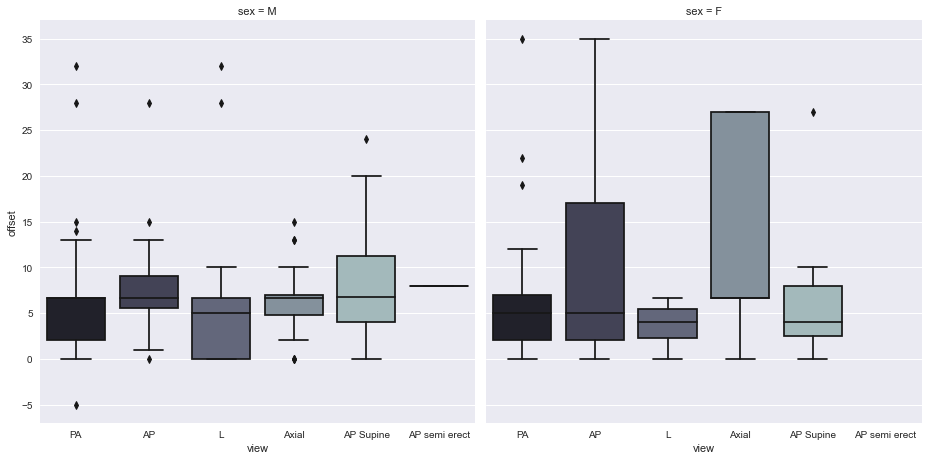

In [10]:
sns.catplot('view','offset',data=df,kind='box',col='sex',col_wrap=2,height=6.5,palette='bone')
plt.show()

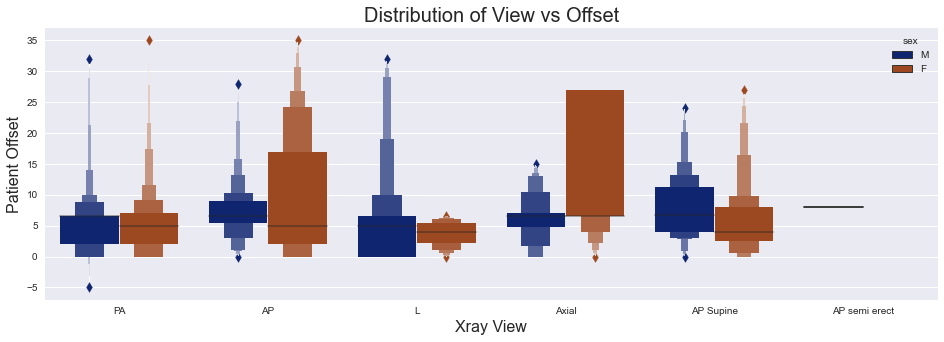

In [11]:
plt.rcParams['figure.figsize'] = (16,5)

sns.boxenplot('view','offset',data=df,hue='sex',palette='dark')
plt.title('Distribution of View vs Offset',fontsize=20)
plt.xlabel('Xray View',fontsize=16)
plt.ylabel('Patient Offset',fontsize=16)
plt.show()

In [12]:
def extract(x):
    if x.split(', ')[-1] == 'CA USA':
        return (x.split(', ')[-1]).split()[-1]
    
    return x.split(', ')[-1]

df['country'] = df['location'].apply(lambda x: extract(x))

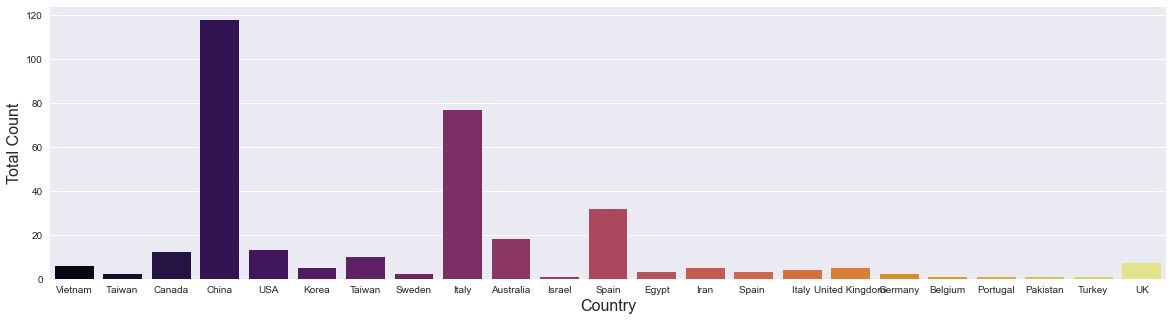

In [16]:
plt.rcParams['figure.figsize'] = (20,5)


sns.countplot('country',data=df,palette='inferno')
plt.xlabel('Country',fontsize=16)
plt.ylabel('Total Count',fontsize=16)
plt.show()

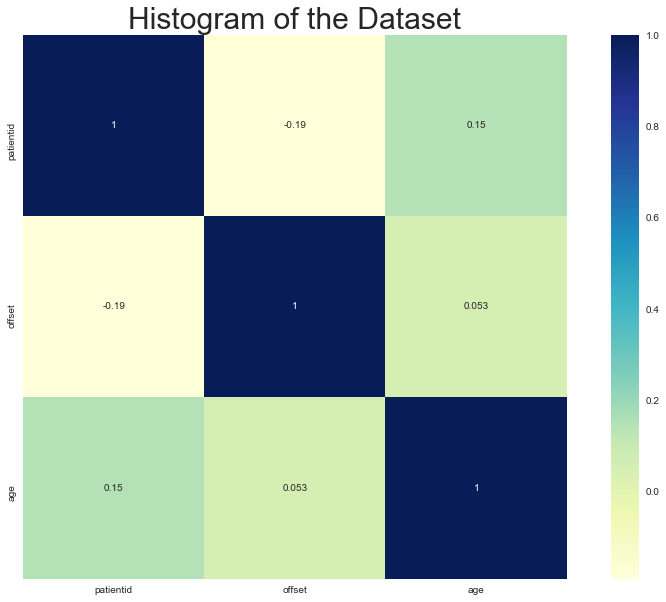

In [17]:
plt.style.use('fast')

plt.rcParams['figure.figsize'] = (16,10)
sns.heatmap(df.corr(),annot=True,square=True,cmap="YlGnBu",)
plt.title('Histogram of the Dataset', fontsize = 30)
plt.show()

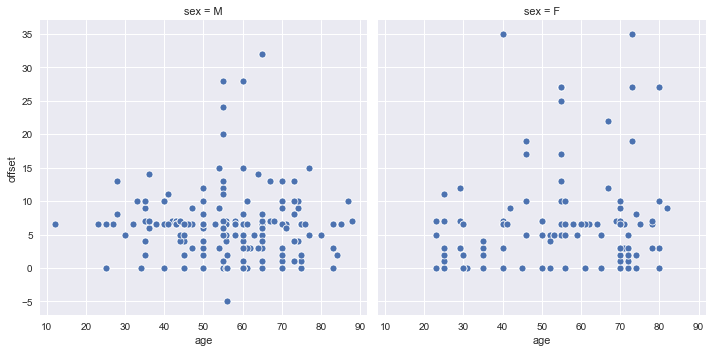

In [24]:
sns.relplot('age','offset',data=df,col='sex',col_wrap=2,height=5,palette='bone')
plt.show()

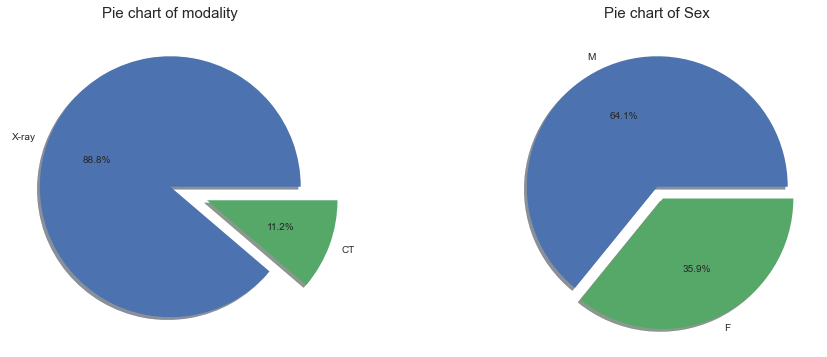

In [47]:
fig,ax = plt.subplots(1,2,figsize=(16,6))

label_ax0 = df.modality.unique()
label_ax1 = df.sex.unique()
exp = [0.0,0.3]

ax[0].pie(df.modality.value_counts(),shadow=True,explode=exp,labels=label_ax0,autopct='%1.1f%%')
ax[0].set_title('Pie chart of modality',fontsize=15)

exp = [0.0,0.1]
ax[1].pie(df.sex.value_counts(),shadow=True,explode=exp,labels=label_ax1,autopct='%1.1f%%')
ax[1].set_title('Pie chart of Sex',fontsize=15)
plt.show()

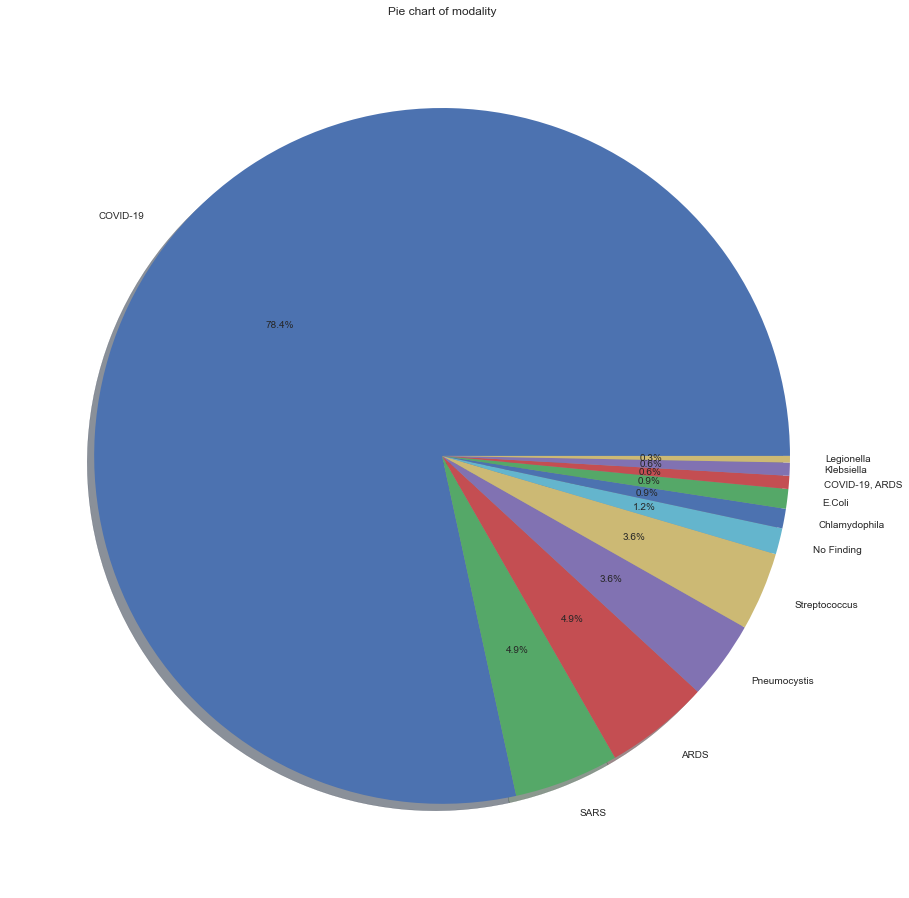

In [42]:
#exp = [0.0,0.3]
label = df.finding.unique()
plt.rcParams['figure.figsize'] = (16,16)
plt.pie(df.finding.value_counts(),shadow=True,labels=label,autopct='%1.1f%%')
plt.title('Pie chart of modality')
plt.show()

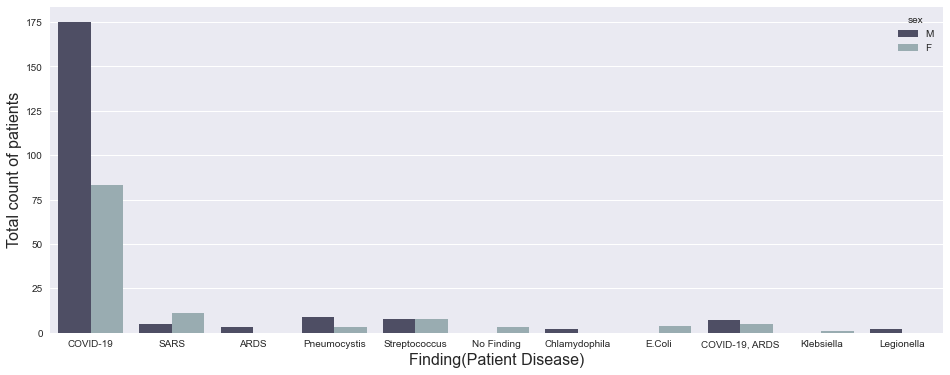

In [49]:
plt.rcParams['figure.figsize'] = (16,6)

sns.countplot('finding',data=df,palette = 'bone',hue='sex')
plt.xlabel('Finding(Patient Disease)',fontsize=16)
plt.ylabel('Total count of patients',fontsize=16)
plt.show()